# 3.1.1 Architecture: GCN Model



In this notebook we try to find the best performing architecture of our Graph Convolutional Network and the node classification problem on the Chrome data. The steps are as follows:

1. Setting up the training parameters
2. Evaluating the performance with
    - different amount of layers
    - centrality metrics as features
    - different amount of hidden channels
    - different criteria
3. Comparing all models with ROC curve

### Dataset Configuration

In [128]:
data_name = 'chrome-run-01'

### Set Up

In [129]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import torch

In [131]:
import os
import sys
models_path = os.path.join('..', 'src', 'models')
definitions_path = os.path.join('..', 'models', 'definitions')
data_path = os.path.join('..', 'src', 'data')
sys.path.append(models_path)
sys.path.append(definitions_path)
sys.path.append(data_path)
import train_model
import evaluate_model
import gnn
import criterion as cr

We create a csv file to store the training from this notebook into the folder ```reports```:

In [132]:
# Specify location to store the training logs csv
csv_file = os.path.join('..', 'reports', 'gcn', 'architecture_log.csv')

We load the dataset from the ````processed```` data file:

In [133]:
# Load the data and the node indices
data_name = f"{data_name}-without-centrality-metrics"
data_path = os.path.join('..', 'data', 'processed', f"{data_name}.pt")
data = torch.load(data_path)

print(data)

Data(x=[25338, 33], edge_index=[2, 131846], num_nodes=25338, y=[25338], train_mask=[25338], val_mask=[25338], test_mask=[25338])


We also load and the data with the centrality metrics:

In [113]:
# Load the data wit the centrality metrics and the node indices
data_with_centrality_name = f"{data_name}-with-centrality-metrics"
data_with_centrality_path = os.path.join('..', 'data', 'processed', f"{data_with_centrality_name}.pt")
data_with_centrality = torch.load(data_with_centrality_path)

print(data_with_centrality)

Data(x=[25338, 49], edge_index=[2, 131846], num_nodes=25338, y=[25338], train_mask=[25338], val_mask=[25338], test_mask=[25338])


### Step 1: Setting up the training parameters

We initally use the hyperparameters from the WTAGraph and use class weights to address the class imbalance:

In [114]:
# Hyperparameters
hidden_channels = 32
learning_rate = 0.005
num_epochs = 1000
weight_decay = 5e-4
dropout_rate = 0.0

# Calculating class weights
labels = data.y[data.train_mask]
class_counts = labels.bincount()
class_weights = 1. / class_counts.float()
class_weights = class_weights / class_weights.sum()  # Normalize weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)
data_with_centrality = data_with_centrality.to(device)

# Loss function
cross_entropy = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

### Step 2.1: Evaluating the performance with different amount of layers

In [115]:
# Models with 2 and 3 layers
models_layers = [
    {'model_name': 'GCN 2 Layers', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN 3 Layers', 'model': gnn.GCN_3_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy}
]


Training GCN 2 Layers model (1/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers, Epoch: 50, Loss: 0.5814, Val Loss: 0.5792, Val Accuracy: 0.7631, Val Precision: 0.5997, Val Recall: 0.9020, Val F1: 0.7204
Run: 1/3, Model: GCN 2 Layers, Epoch: 100, Loss: 0.5275, Val Loss: 0.5206, Val Accuracy: 0.7765, Val Precision: 0.6207, Val Recall: 0.8728, Val F1: 0.7255
Run: 1/3, Model: GCN 2 Layers, Epoch: 150, Loss: 0.5018, Val Loss: 0.4988, Val Accuracy: 0.7813, Val Precision: 0.6323, Val Recall: 0.8448, Val F1: 0.7233
Run: 1/3, Model: GCN 2 Layers, Epoch: 200, Loss: 0.4843, Val Loss: 0.4858, Val Accuracy: 0.7892, Val Precision: 0.6502, Val Recall: 0.8156, Val F1: 0.7236
Early stopping at epoch 245


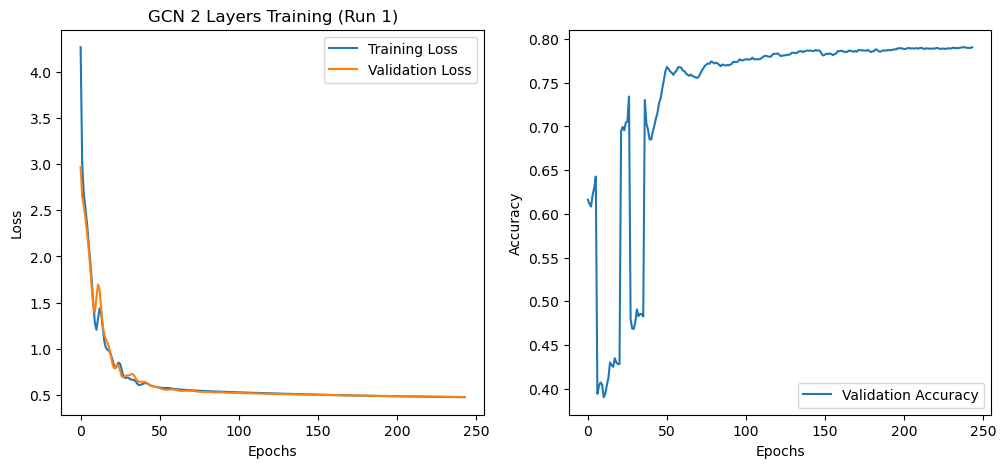

Run: 2/3, Model: GCN 2 Layers, Epoch: 50, Loss: 0.5835, Val Loss: 0.5654, Val Accuracy: 0.7608, Val Precision: 0.5946, Val Recall: 0.9207, Val F1: 0.7225
Run: 2/3, Model: GCN 2 Layers, Epoch: 100, Loss: 0.5319, Val Loss: 0.5154, Val Accuracy: 0.7797, Val Precision: 0.6216, Val Recall: 0.8915, Val F1: 0.7325
Run: 2/3, Model: GCN 2 Layers, Epoch: 150, Loss: 0.5070, Val Loss: 0.4937, Val Accuracy: 0.7880, Val Precision: 0.6396, Val Recall: 0.8553, Val F1: 0.7319
Run: 2/3, Model: GCN 2 Layers, Epoch: 200, Loss: 0.4914, Val Loss: 0.4792, Val Accuracy: 0.7900, Val Precision: 0.6476, Val Recall: 0.8320, Val F1: 0.7283
Run: 2/3, Model: GCN 2 Layers, Epoch: 250, Loss: 0.4804, Val Loss: 0.4688, Val Accuracy: 0.7939, Val Precision: 0.6567, Val Recall: 0.8191, Val F1: 0.7290
Early stopping at epoch 265


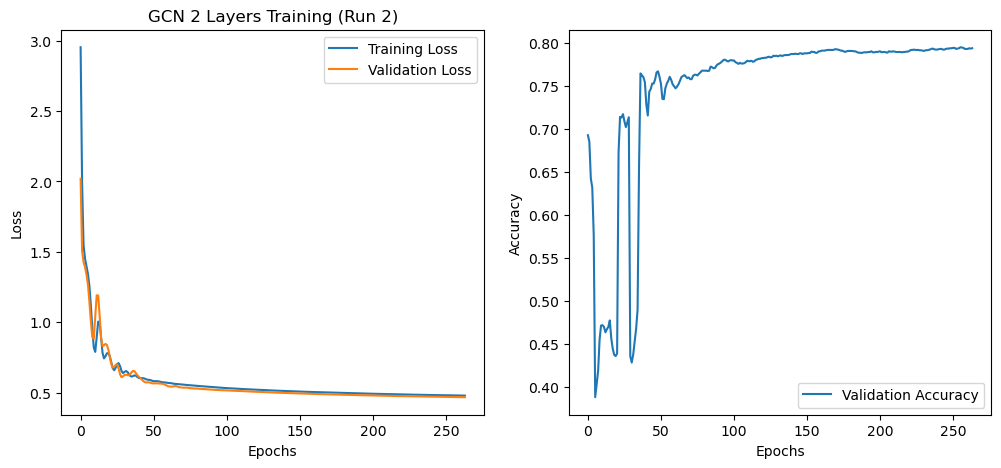

Run: 3/3, Model: GCN 2 Layers, Epoch: 50, Loss: 0.6213, Val Loss: 0.7105, Val Accuracy: 0.7675, Val Precision: 0.6354, Val Recall: 0.7340, Val F1: 0.6811
Run: 3/3, Model: GCN 2 Layers, Epoch: 100, Loss: 0.5383, Val Loss: 0.5453, Val Accuracy: 0.7698, Val Precision: 0.6142, Val Recall: 0.8600, Val F1: 0.7166
Run: 3/3, Model: GCN 2 Layers, Epoch: 150, Loss: 0.5098, Val Loss: 0.5036, Val Accuracy: 0.7908, Val Precision: 0.6461, Val Recall: 0.8436, Val F1: 0.7318
Run: 3/3, Model: GCN 2 Layers, Epoch: 200, Loss: 0.4940, Val Loss: 0.4842, Val Accuracy: 0.7864, Val Precision: 0.6431, Val Recall: 0.8285, Val F1: 0.7241
Run: 3/3, Model: GCN 2 Layers, Epoch: 250, Loss: 0.4826, Val Loss: 0.4731, Val Accuracy: 0.7912, Val Precision: 0.6516, Val Recall: 0.8226, Val F1: 0.7272
Early stopping at epoch 261


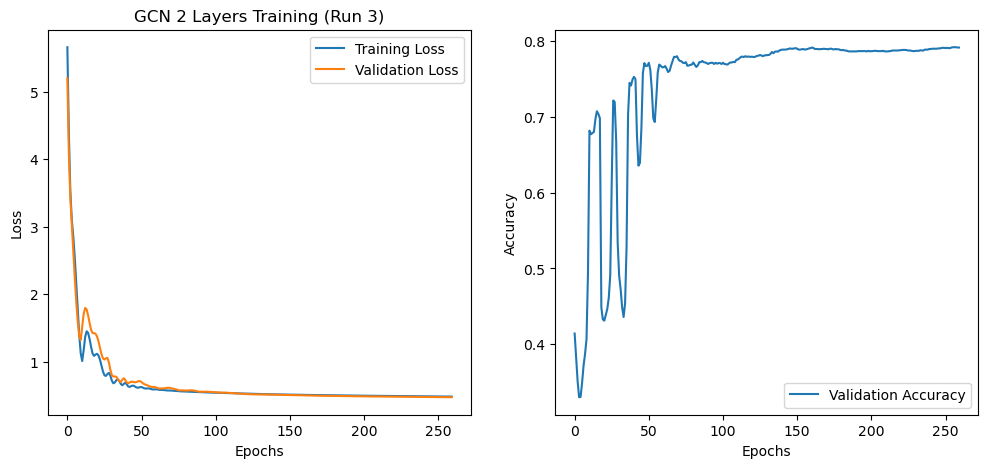


Successfully trained GCN 2 Layers model (1/2) on chrome-run-01-without-centrality-metrics dataset

Training GCN 3 Layers model (2/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 3 Layers, Epoch: 50, Loss: 0.5665, Val Loss: 0.5605, Val Accuracy: 0.7339, Val Precision: 0.5694, Val Recall: 0.8763, Val F1: 0.6903
Run: 1/3, Model: GCN 3 Layers, Epoch: 100, Loss: 0.5288, Val Loss: 0.5224, Val Accuracy: 0.7592, Val Precision: 0.6056, Val Recall: 0.8261, Val F1: 0.6989
Run: 1/3, Model: GCN 3 Layers, Epoch: 150, Loss: 0.5033, Val Loss: 0.4967, Val Accuracy: 0.7762, Val Precision: 0.6323, Val Recall: 0.8086, Val F1: 0.7097
Run: 1/3, Model: GCN 3 Layers, Epoch: 200, Loss: 0.4875, Val Loss: 0.4809, Val Accuracy: 0.7825, Val Precision: 0.6366, Val Recall: 0.8320, Val F1: 0.7213
Run: 1/3, Model: GCN 3 Layers, Epoch: 250, Loss: 0.4752, Val Loss: 0.4764, Val Accuracy: 0.7848, Val Precision: 0.6628, Val Recall: 0.7410, Val F1: 0.6997
Run: 1/3, Model: GCN 3 Layers, Epoch

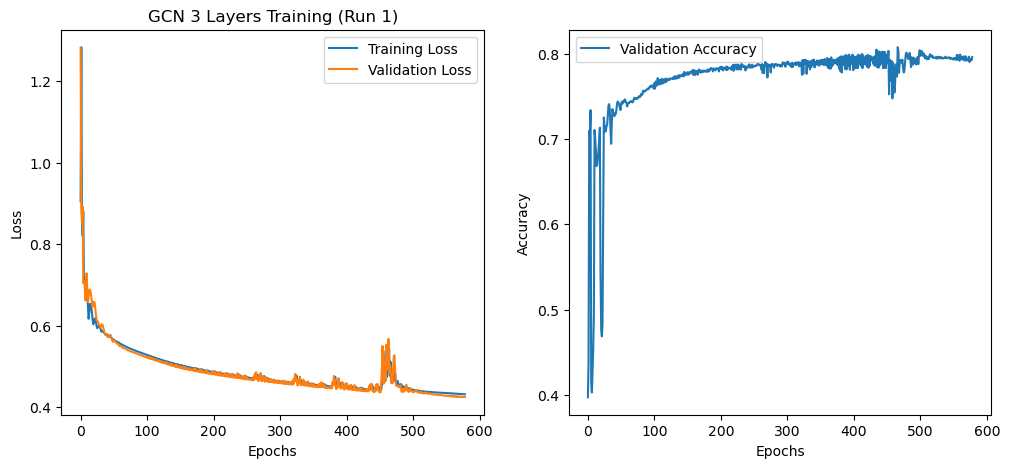

Run: 2/3, Model: GCN 3 Layers, Epoch: 50, Loss: 0.5698, Val Loss: 0.5731, Val Accuracy: 0.7529, Val Precision: 0.5880, Val Recall: 0.9008, Val F1: 0.7115
Run: 2/3, Model: GCN 3 Layers, Epoch: 100, Loss: 0.5307, Val Loss: 0.5210, Val Accuracy: 0.7663, Val Precision: 0.6174, Val Recall: 0.8133, Val F1: 0.7019
Run: 2/3, Model: GCN 3 Layers, Epoch: 150, Loss: 0.5068, Val Loss: 0.4946, Val Accuracy: 0.7781, Val Precision: 0.6342, Val Recall: 0.8133, Val F1: 0.7127
Run: 2/3, Model: GCN 3 Layers, Epoch: 200, Loss: 0.4873, Val Loss: 0.4744, Val Accuracy: 0.7821, Val Precision: 0.6348, Val Recall: 0.8378, Val F1: 0.7223
Run: 2/3, Model: GCN 3 Layers, Epoch: 250, Loss: 0.4714, Val Loss: 0.4587, Val Accuracy: 0.7852, Val Precision: 0.6357, Val Recall: 0.8553, Val F1: 0.7294
Run: 2/3, Model: GCN 3 Layers, Epoch: 300, Loss: 0.4620, Val Loss: 0.4504, Val Accuracy: 0.7983, Val Precision: 0.6709, Val Recall: 0.7923, Val F1: 0.7266
Run: 2/3, Model: GCN 3 Layers, Epoch: 350, Loss: 0.4491, Val Loss: 0.43

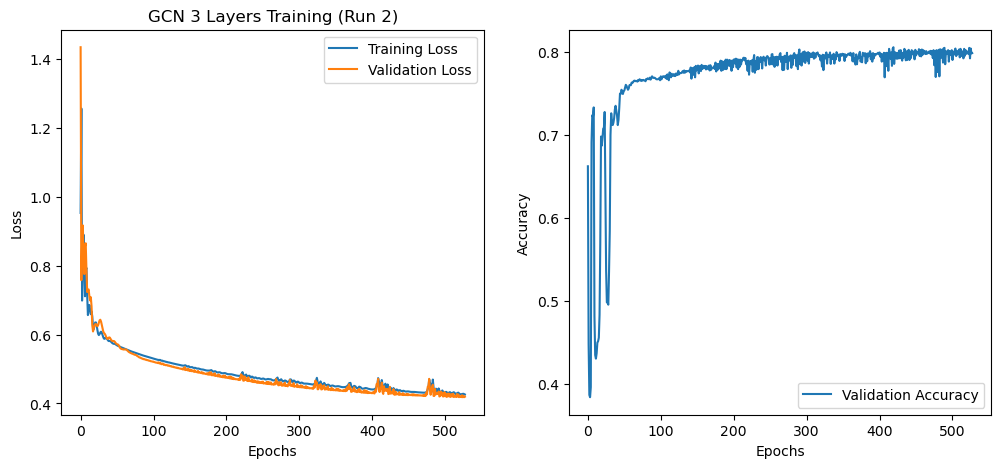

Run: 3/3, Model: GCN 3 Layers, Epoch: 50, Loss: 0.5967, Val Loss: 0.6006, Val Accuracy: 0.7114, Val Precision: 0.5437, Val Recall: 0.9148, Val F1: 0.6820
Run: 3/3, Model: GCN 3 Layers, Epoch: 100, Loss: 0.5491, Val Loss: 0.5411, Val Accuracy: 0.7485, Val Precision: 0.5894, Val Recall: 0.8460, Val F1: 0.6948
Run: 3/3, Model: GCN 3 Layers, Epoch: 150, Loss: 0.5206, Val Loss: 0.5171, Val Accuracy: 0.7655, Val Precision: 0.6201, Val Recall: 0.7923, Val F1: 0.6957
Run: 3/3, Model: GCN 3 Layers, Epoch: 200, Loss: 0.5007, Val Loss: 0.5026, Val Accuracy: 0.7746, Val Precision: 0.6402, Val Recall: 0.7620, Val F1: 0.6958
Early stopping at epoch 201


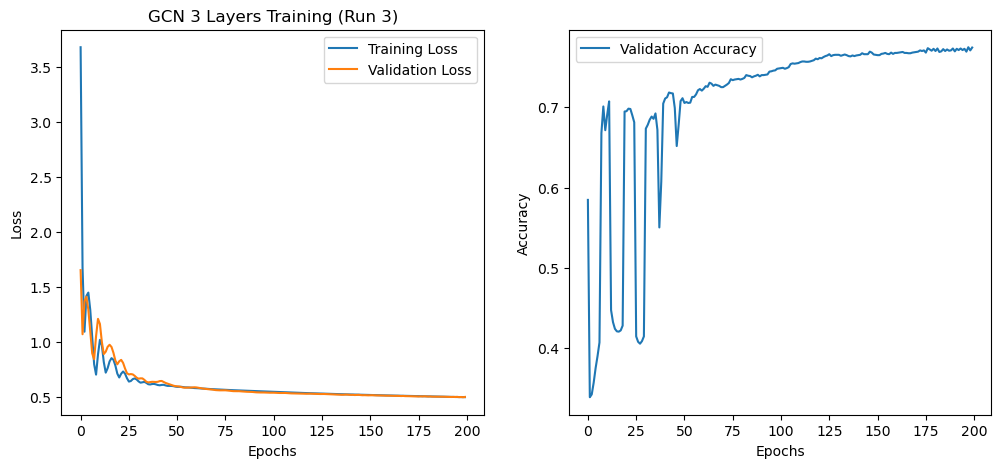


Successfully trained GCN 3 Layers model (2/2) on chrome-run-01-without-centrality-metrics dataset


In [116]:
# Train the models
trained_models_layers = train_model.train_validate(models_layers, csv_file, num_runs=3)
base_line_model = [trained_models_layers[0]]


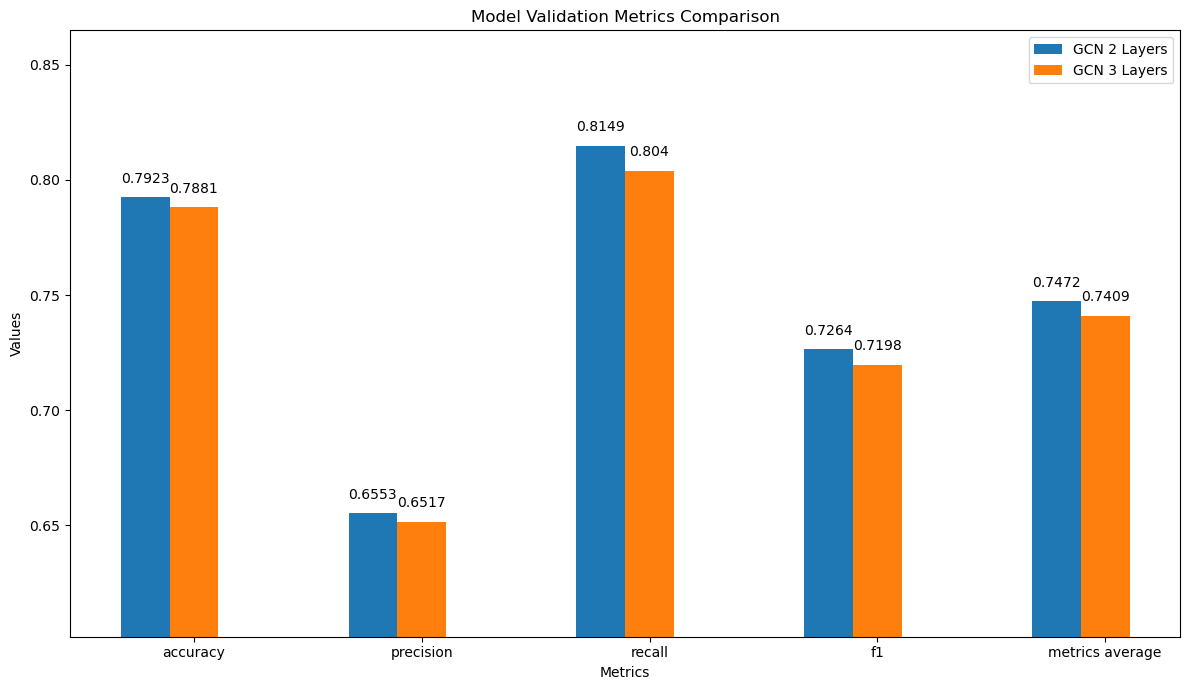

Standard Deviation for Accuracy: 0.002
Standard Deviation for Precision: 0.002
Standard Deviation for Recall: 0.005
Standard Deviation for F1: 0.003


In [117]:
# Compare the models
evaluate_model.plot_val_metrics(trained_models_layers)

### Step 2.2: Evaluating the performance with centrality metrics as features

We use the model with the two layers and initalize it with the added centrality metrics as features:

In [118]:
# Model with centrality metrics
model_with_centrality = [{'model_name': 'GCN 2 Layers With Centrality Metrics', 'model': gnn.GCN_2_Layers, 'data_name': data_with_centrality_name, 'data': data_with_centrality, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy}]


Training GCN 2 Layers With Centrality Metrics model (1/1) on chrome-run-01-with-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 50, Loss: 50.4518, Val Loss: 28.0397, Val Accuracy: 0.4884, Val Precision: 0.3626, Val Recall: 0.6898, Val F1: 0.4753
Run: 1/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 100, Loss: 31.2461, Val Loss: 13.7642, Val Accuracy: 0.4311, Val Precision: 0.3699, Val Recall: 0.9859, Val F1: 0.5380
Run: 1/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 150, Loss: 33.0530, Val Loss: 16.1163, Val Accuracy: 0.4161, Val Precision: 0.3644, Val Recall: 0.9918, Val F1: 0.5330
Run: 1/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 200, Loss: 12.6633, Val Loss: 44.6153, Val Accuracy: 0.6822, Val Precision: 0.6949, Val Recall: 0.0964, Val F1: 0.1692
Run: 1/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 250, Loss: 21.4084, Val Loss: 51.3501, Val Accuracy: 0.6802, Val Precision: 0.6565, Val Recall: 0.1011,

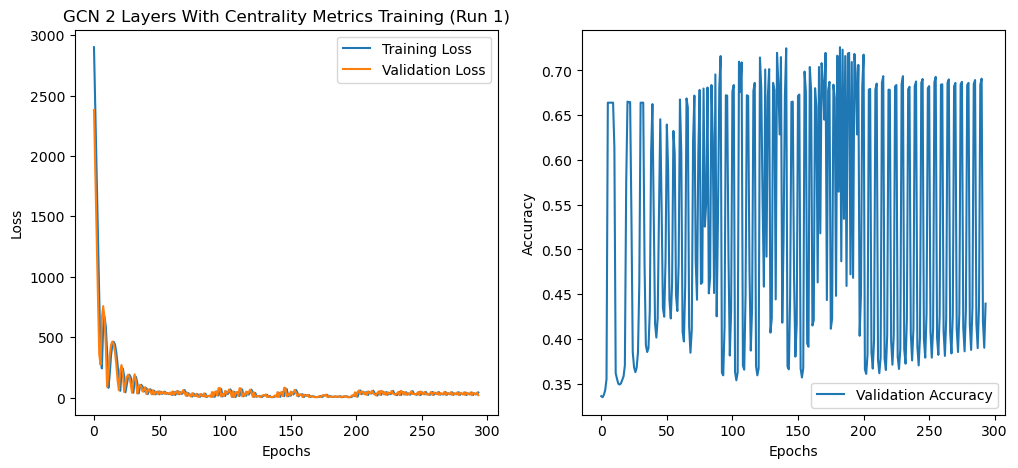

Run: 2/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 50, Loss: 11.1794, Val Loss: 16.9676, Val Accuracy: 0.4280, Val Precision: 0.3660, Val Recall: 0.9600, Val F1: 0.5300
Run: 2/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 100, Loss: 33.3932, Val Loss: 47.1868, Val Accuracy: 0.3656, Val Precision: 0.3457, Val Recall: 0.9953, Val F1: 0.5132
Run: 2/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 150, Loss: 25.4125, Val Loss: 37.7017, Val Accuracy: 0.3908, Val Precision: 0.3546, Val Recall: 0.9918, Val F1: 0.5224
Run: 2/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 200, Loss: 21.7644, Val Loss: 33.5070, Val Accuracy: 0.3983, Val Precision: 0.3575, Val Recall: 0.9918, Val F1: 0.5255
Early stopping at epoch 201


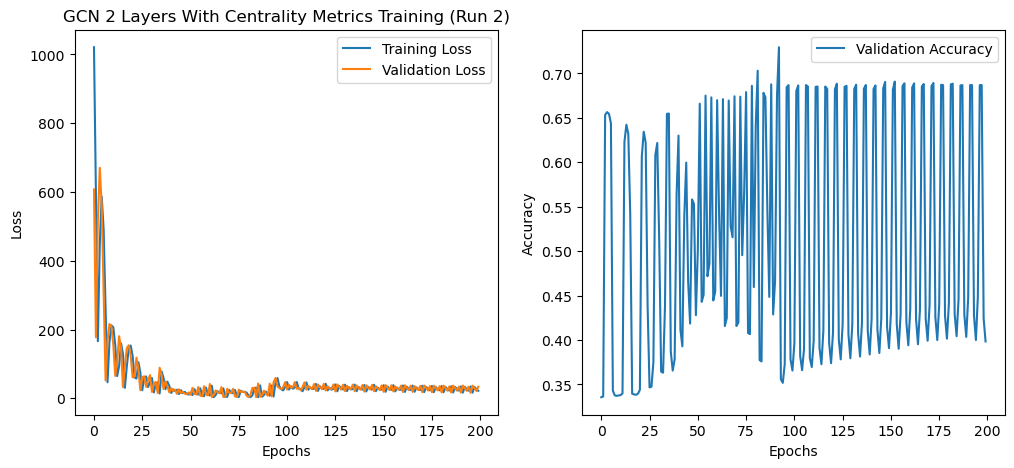

Run: 3/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 50, Loss: 33.1217, Val Loss: 69.4483, Val Accuracy: 0.3478, Val Precision: 0.3396, Val Recall: 0.9965, Val F1: 0.5066
Run: 3/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 100, Loss: 46.3554, Val Loss: 28.4237, Val Accuracy: 0.3968, Val Precision: 0.3564, Val Recall: 0.9871, Val F1: 0.5237
Run: 3/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 150, Loss: 38.9965, Val Loss: 18.2704, Val Accuracy: 0.4311, Val Precision: 0.3695, Val Recall: 0.9812, Val F1: 0.5368
Run: 3/3, Model: GCN 2 Layers With Centrality Metrics, Epoch: 200, Loss: 33.9173, Val Loss: 14.0455, Val Accuracy: 0.4801, Val Precision: 0.3905, Val Recall: 0.9765, Val F1: 0.5579
Early stopping at epoch 201


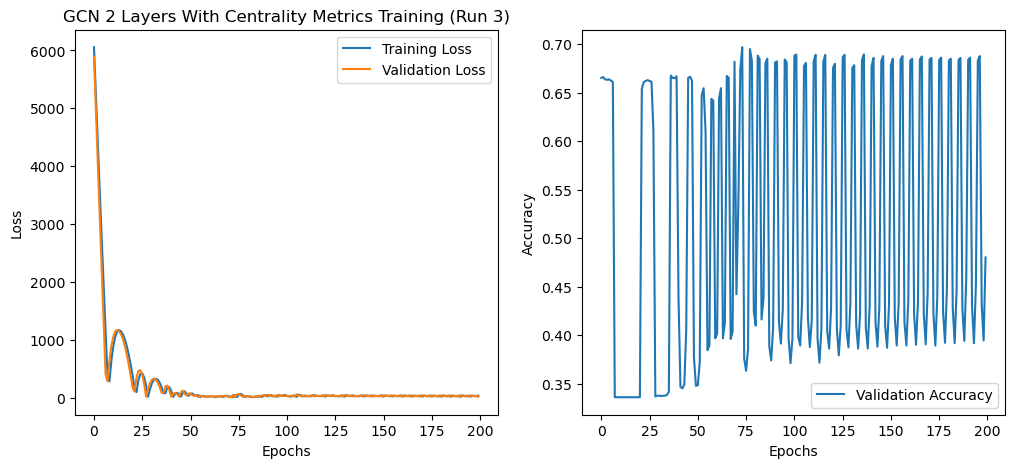


Successfully trained GCN 2 Layers With Centrality Metrics model (1/1) on chrome-run-01-with-centrality-metrics dataset


In [119]:
# Train the model
trained_model_with_centrality = train_model.train_validate(model_with_centrality, csv_file, num_runs=3)


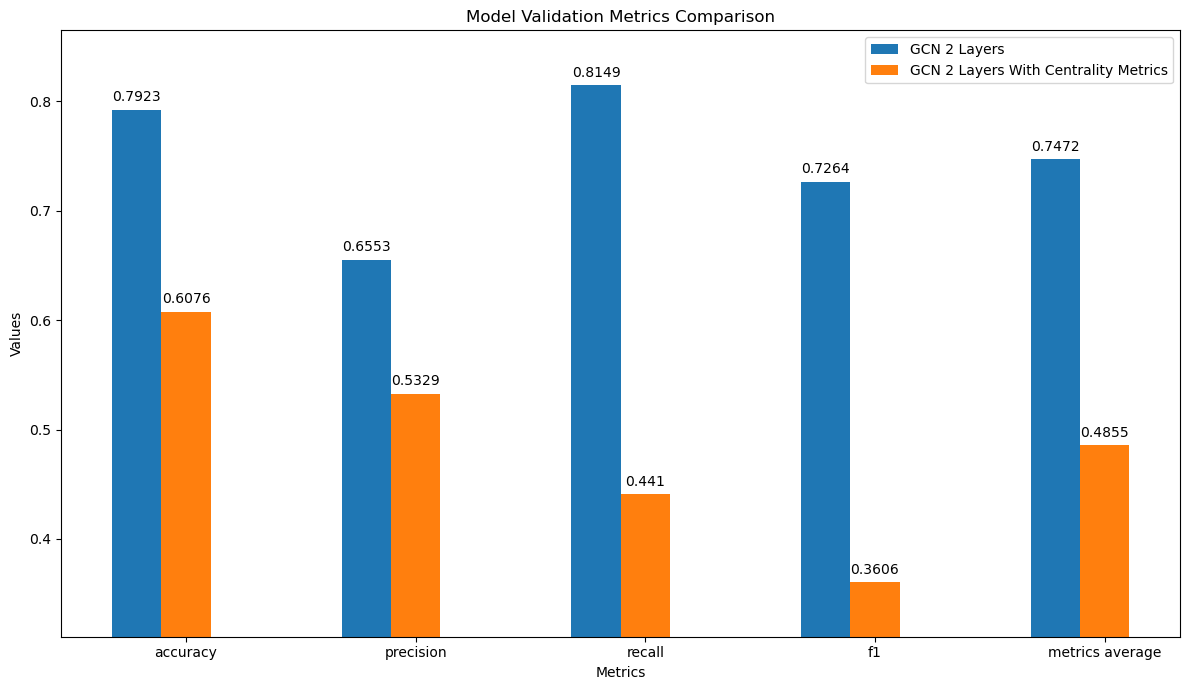

Standard Deviation for Accuracy: 0.092
Standard Deviation for Precision: 0.061
Standard Deviation for Recall: 0.187
Standard Deviation for F1: 0.183


In [120]:
# Compare the model with baseline model
evaluate_model.plot_val_metrics(base_line_model + trained_model_with_centrality)

### Step 2.3: Evaluating the performance with different amount of hidden channels

In [121]:
# Models with 64 and 128 hidden channels
models_hidden_channels = [
    {'model_name': 'GCN 2 Layers With 64 Hidden Channels', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': 64, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy},
    {'model_name': 'GCN 2 Layers With 128 Hidden Channels', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': 128, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': cross_entropy}
    ]


Training GCN 2 Layers With 64 Hidden Channels model (1/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 50, Loss: 0.6092, Val Loss: 0.6849, Val Accuracy: 0.7556, Val Precision: 0.5995, Val Recall: 0.8366, Val F1: 0.6985
Run: 1/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 100, Loss: 0.5200, Val Loss: 0.5037, Val Accuracy: 0.7852, Val Precision: 0.6348, Val Recall: 0.8600, Val F1: 0.7304
Run: 1/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 150, Loss: 0.4965, Val Loss: 0.4858, Val Accuracy: 0.7975, Val Precision: 0.6547, Val Recall: 0.8495, Val F1: 0.7395
Run: 1/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 200, Loss: 0.4812, Val Loss: 0.4699, Val Accuracy: 0.7994, Val Precision: 0.6591, Val Recall: 0.8436, Val F1: 0.7400
Run: 1/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 250, Loss: 0.4663, Val Loss: 0.4545, Val Accuracy: 0.8018, Val Precision: 0.6618, Val Recall: 0.8471, Val F1

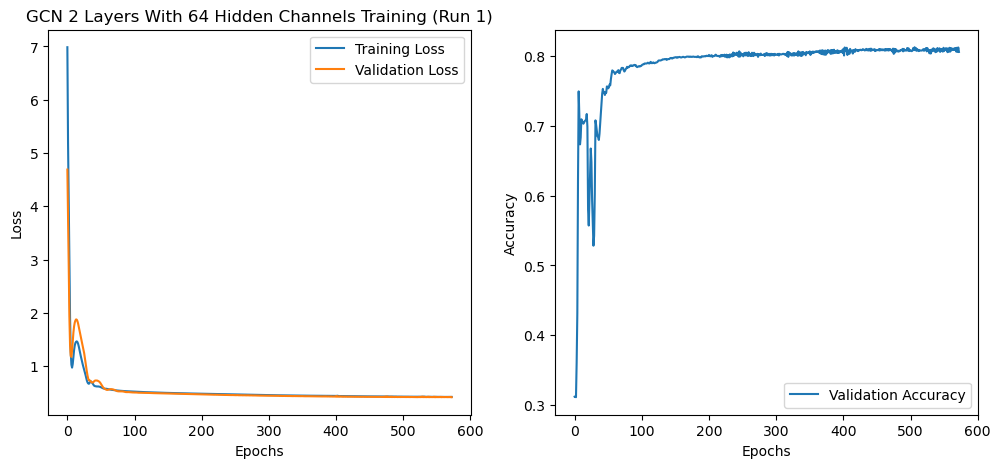

Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 50, Loss: 0.5500, Val Loss: 0.5326, Val Accuracy: 0.7722, Val Precision: 0.6097, Val Recall: 0.9078, Val F1: 0.7295
Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 100, Loss: 0.5089, Val Loss: 0.4952, Val Accuracy: 0.7888, Val Precision: 0.6405, Val Recall: 0.8565, Val F1: 0.7329
Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 150, Loss: 0.4859, Val Loss: 0.4759, Val Accuracy: 0.7959, Val Precision: 0.6532, Val Recall: 0.8460, Val F1: 0.7372
Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 200, Loss: 0.4705, Val Loss: 0.4615, Val Accuracy: 0.8014, Val Precision: 0.6621, Val Recall: 0.8436, Val F1: 0.7419
Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 250, Loss: 0.4587, Val Loss: 0.4513, Val Accuracy: 0.8042, Val Precision: 0.6670, Val Recall: 0.8413, Val F1: 0.7441
Run: 2/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 300, Loss: 0.4495, Val Loss: 0.4435, Val Acc

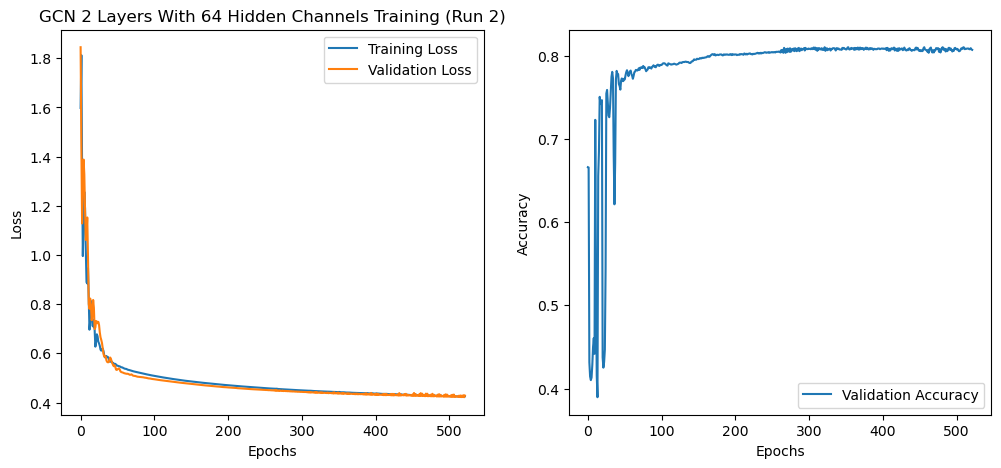

Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 50, Loss: 0.5519, Val Loss: 0.5550, Val Accuracy: 0.7671, Val Precision: 0.6095, Val Recall: 0.8670, Val F1: 0.7158
Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 100, Loss: 0.5099, Val Loss: 0.5011, Val Accuracy: 0.7829, Val Precision: 0.6306, Val Recall: 0.8646, Val F1: 0.7293
Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 150, Loss: 0.4880, Val Loss: 0.4829, Val Accuracy: 0.7912, Val Precision: 0.6472, Val Recall: 0.8413, Val F1: 0.7316
Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 200, Loss: 0.4717, Val Loss: 0.4691, Val Accuracy: 0.7963, Val Precision: 0.6546, Val Recall: 0.8425, Val F1: 0.7367
Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 250, Loss: 0.4592, Val Loss: 0.4578, Val Accuracy: 0.7983, Val Precision: 0.6567, Val Recall: 0.8460, Val F1: 0.7394
Run: 3/3, Model: GCN 2 Layers With 64 Hidden Channels, Epoch: 300, Loss: 0.4492, Val Loss: 0.4520, Val Acc

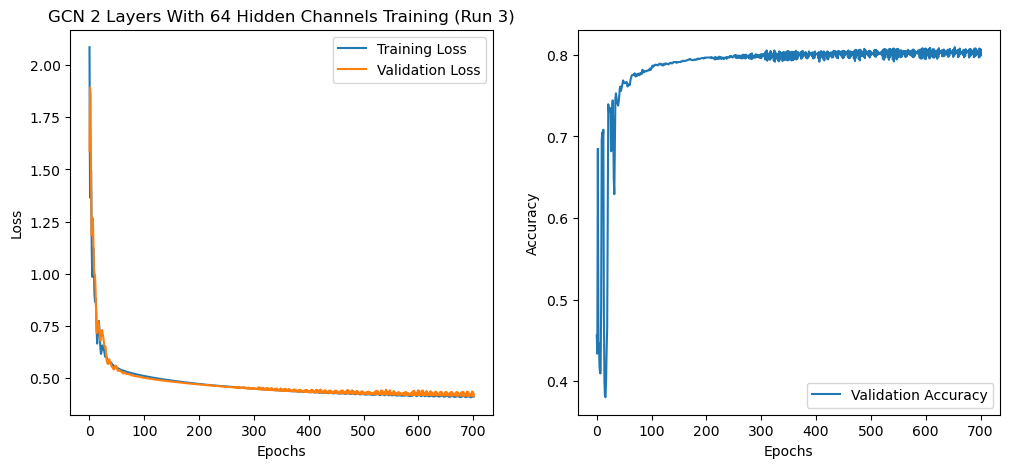


Successfully trained GCN 2 Layers With 64 Hidden Channels model (1/2) on chrome-run-01-without-centrality-metrics dataset

Training GCN 2 Layers With 128 Hidden Channels model (2/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 50, Loss: 0.5690, Val Loss: 0.6029, Val Accuracy: 0.7777, Val Precision: 0.6491, Val Recall: 0.7468, Val F1: 0.6945
Run: 1/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 100, Loss: 0.5148, Val Loss: 0.5048, Val Accuracy: 0.7959, Val Precision: 0.6489, Val Recall: 0.8646, Val F1: 0.7414
Run: 1/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 150, Loss: 0.4921, Val Loss: 0.4857, Val Accuracy: 0.8010, Val Precision: 0.6600, Val Recall: 0.8495, Val F1: 0.7429
Run: 1/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 200, Loss: 0.4741, Val Loss: 0.4688, Val Accuracy: 0.7998, Val Precision: 0.6577, Val Recall: 0.8518, Val F1: 0.7422
Run: 1/3, Model: GCN 2 Layers With 128 Hid

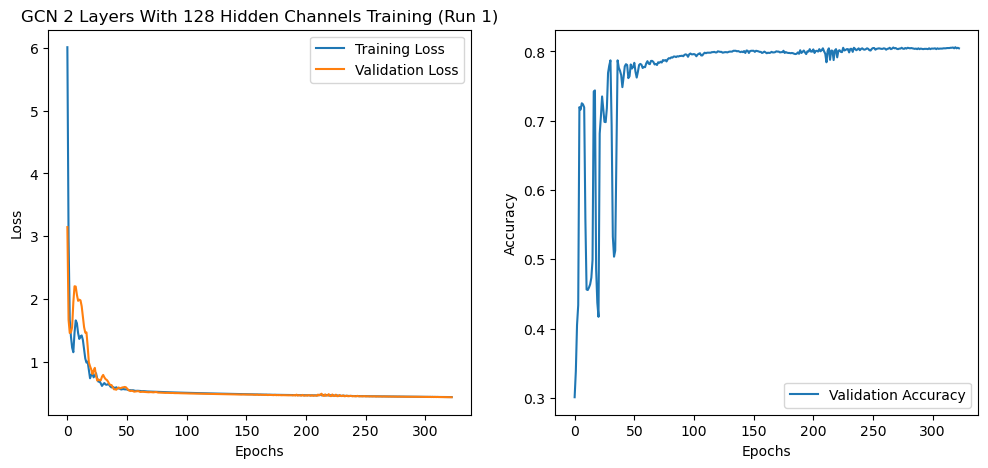

Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 50, Loss: 0.5833, Val Loss: 0.5847, Val Accuracy: 0.7592, Val Precision: 0.6100, Val Recall: 0.7993, Val F1: 0.6919
Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 100, Loss: 0.5252, Val Loss: 0.5153, Val Accuracy: 0.7884, Val Precision: 0.6317, Val Recall: 0.8985, Val F1: 0.7418
Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 150, Loss: 0.4975, Val Loss: 0.4898, Val Accuracy: 0.7994, Val Precision: 0.6540, Val Recall: 0.8646, Val F1: 0.7447
Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 200, Loss: 0.4782, Val Loss: 0.4731, Val Accuracy: 0.8042, Val Precision: 0.6670, Val Recall: 0.8413, Val F1: 0.7441
Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 250, Loss: 0.4615, Val Loss: 0.4550, Val Accuracy: 0.8050, Val Precision: 0.6685, Val Recall: 0.8401, Val F1: 0.7446
Run: 2/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 300, Loss: 0.4483, Val Loss: 0.4467, V

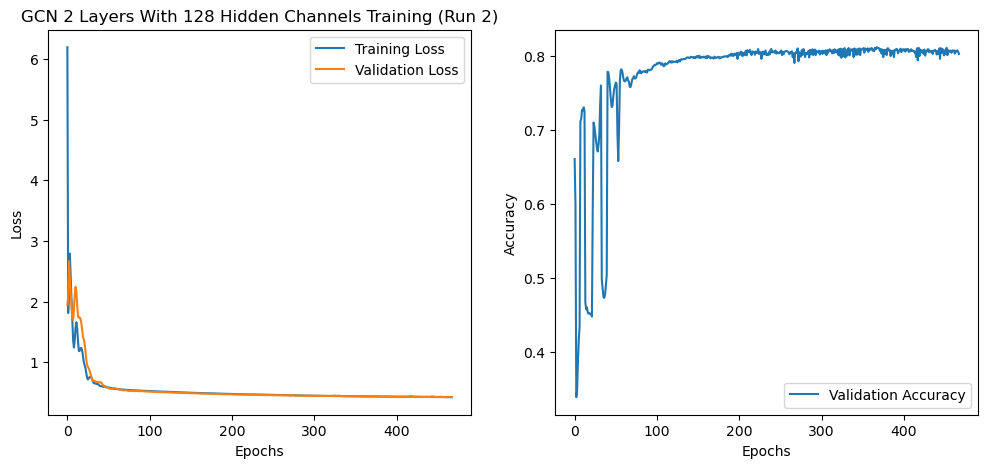

Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 50, Loss: 0.5695, Val Loss: 0.6031, Val Accuracy: 0.7600, Val Precision: 0.5940, Val Recall: 0.9183, Val F1: 0.7214
Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 100, Loss: 0.5144, Val Loss: 0.5082, Val Accuracy: 0.7864, Val Precision: 0.6346, Val Recall: 0.8693, Val F1: 0.7336
Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 150, Loss: 0.4892, Val Loss: 0.4848, Val Accuracy: 0.7951, Val Precision: 0.6512, Val Recall: 0.8495, Val F1: 0.7372
Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 200, Loss: 0.4714, Val Loss: 0.4682, Val Accuracy: 0.7998, Val Precision: 0.6577, Val Recall: 0.8518, Val F1: 0.7422
Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 250, Loss: 0.4566, Val Loss: 0.4532, Val Accuracy: 0.8038, Val Precision: 0.6636, Val Recall: 0.8518, Val F1: 0.7460
Run: 3/3, Model: GCN 2 Layers With 128 Hidden Channels, Epoch: 300, Loss: 0.4447, Val Loss: 0.4446, V

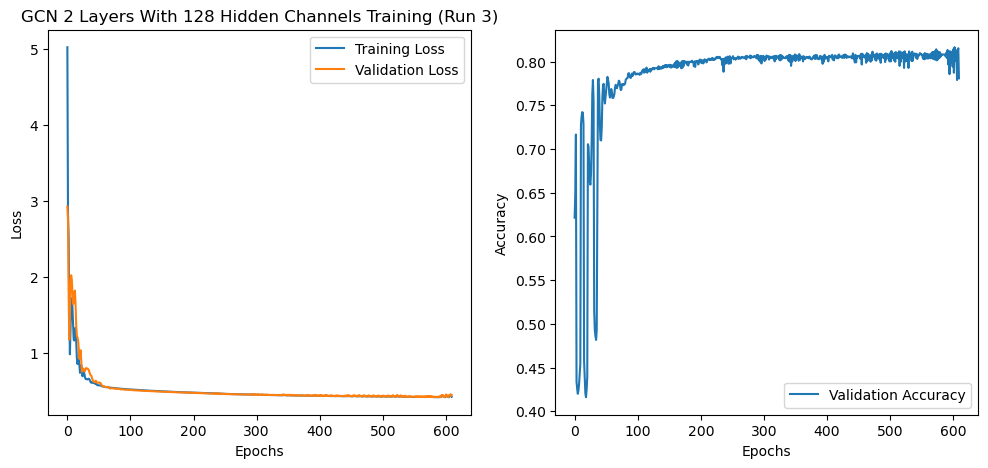


Successfully trained GCN 2 Layers With 128 Hidden Channels model (2/2) on chrome-run-01-without-centrality-metrics dataset


In [122]:
# Train the models
trained_models_hidden_channels = train_model.train_validate(models_hidden_channels, csv_file, num_runs=3)

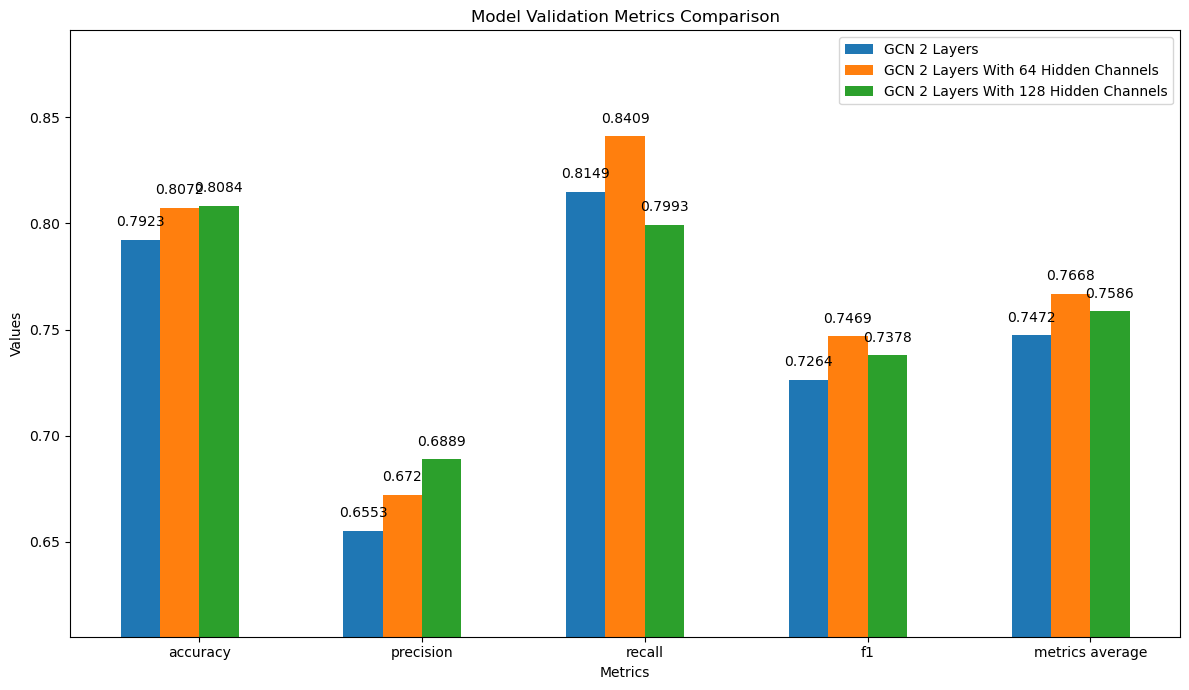

Standard Deviation for Accuracy: 0.007
Standard Deviation for Precision: 0.014
Standard Deviation for Recall: 0.017
Standard Deviation for F1: 0.008


In [123]:
# Compare the models
evaluate_model.plot_val_metrics(base_line_model + trained_models_hidden_channels)

### Step 2.4: Evaluating the performance with different criterias

In [124]:
focal_loss = cr.FocalLoss()
hybrid_loss = cr.HybridLoss()

# Models with focal and hybrid loss
models_criterias = [
    {'model_name': 'GCN 2 Layers With Focal Loss', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': focal_loss},
    {'model_name': 'GCN 2 Layers With Hybrid Loss', 'model': gnn.GCN_2_Layers, 'data_name': data_name, 'data': data, 'hidden_channels': hidden_channels, 'learning_rate': learning_rate, 'num_epochs': num_epochs, 'weight_decay': weight_decay, 'dropout_rate': dropout_rate, 'criterion': hybrid_loss}
    ]


Training GCN 2 Layers With Focal Loss model (1/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers With Focal Loss, Epoch: 50, Loss: 0.2096, Val Loss: 0.2658, Val Accuracy: 0.7481, Val Precision: 0.6816, Val Recall: 0.4796, Val F1: 0.5630
Run: 1/3, Model: GCN 2 Layers With Focal Loss, Epoch: 100, Loss: 0.1421, Val Loss: 0.1425, Val Accuracy: 0.7773, Val Precision: 0.7043, Val Recall: 0.5893, Val F1: 0.6417
Run: 1/3, Model: GCN 2 Layers With Focal Loss, Epoch: 150, Loss: 0.1291, Val Loss: 0.1290, Val Accuracy: 0.7829, Val Precision: 0.7288, Val Recall: 0.5706, Val F1: 0.6401
Run: 1/3, Model: GCN 2 Layers With Focal Loss, Epoch: 200, Loss: 0.1212, Val Loss: 0.1215, Val Accuracy: 0.7872, Val Precision: 0.7395, Val Recall: 0.5729, Val F1: 0.6456
Early stopping at epoch 201


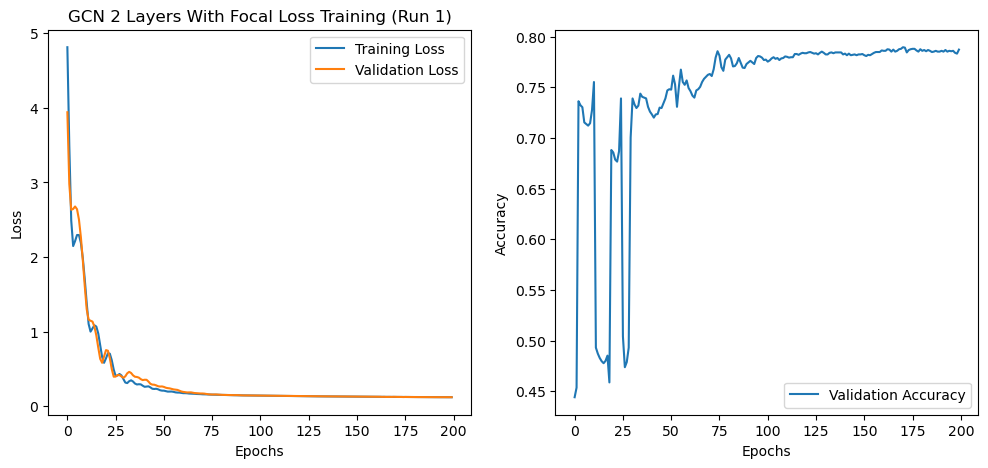

Run: 2/3, Model: GCN 2 Layers With Focal Loss, Epoch: 50, Loss: 0.2147, Val Loss: 0.2365, Val Accuracy: 0.7623, Val Precision: 0.6279, Val Recall: 0.7305, Val F1: 0.6753
Run: 2/3, Model: GCN 2 Layers With Focal Loss, Epoch: 100, Loss: 0.1499, Val Loss: 0.1549, Val Accuracy: 0.7773, Val Precision: 0.7177, Val Recall: 0.5636, Val F1: 0.6314
Run: 2/3, Model: GCN 2 Layers With Focal Loss, Epoch: 150, Loss: 0.1345, Val Loss: 0.1341, Val Accuracy: 0.7797, Val Precision: 0.7340, Val Recall: 0.5473, Val F1: 0.6270
Run: 2/3, Model: GCN 2 Layers With Focal Loss, Epoch: 200, Loss: 0.1264, Val Loss: 0.1256, Val Accuracy: 0.7781, Val Precision: 0.7338, Val Recall: 0.5403, Val F1: 0.6223
Early stopping at epoch 201


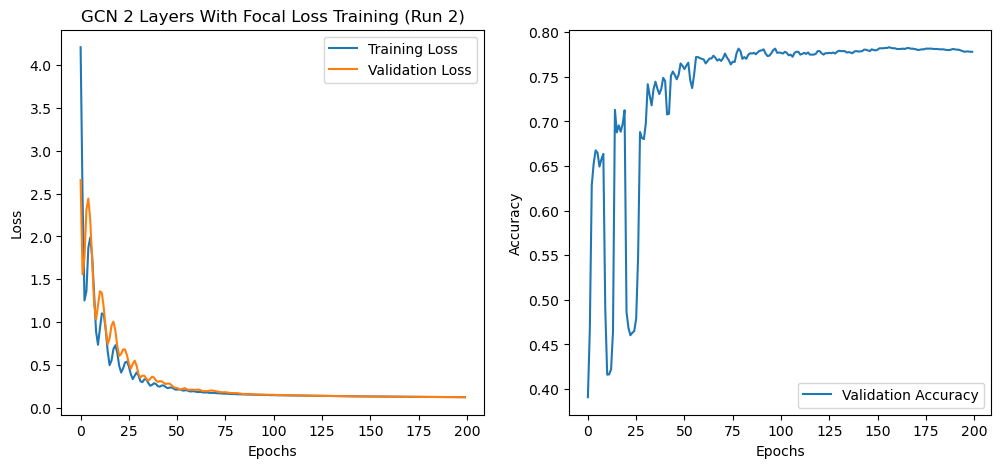

Run: 3/3, Model: GCN 2 Layers With Focal Loss, Epoch: 50, Loss: 0.2675, Val Loss: 0.3669, Val Accuracy: 0.7011, Val Precision: 0.5432, Val Recall: 0.7340, Val F1: 0.6243
Run: 3/3, Model: GCN 2 Layers With Focal Loss, Epoch: 100, Loss: 0.1527, Val Loss: 0.1636, Val Accuracy: 0.7679, Val Precision: 0.7010, Val Recall: 0.5473, Val F1: 0.6147
Run: 3/3, Model: GCN 2 Layers With Focal Loss, Epoch: 150, Loss: 0.1343, Val Loss: 0.1336, Val Accuracy: 0.7734, Val Precision: 0.7264, Val Recall: 0.5298, Val F1: 0.6127
Run: 3/3, Model: GCN 2 Layers With Focal Loss, Epoch: 200, Loss: 0.1263, Val Loss: 0.1271, Val Accuracy: 0.7742, Val Precision: 0.7348, Val Recall: 0.5204, Val F1: 0.6093
Early stopping at epoch 201


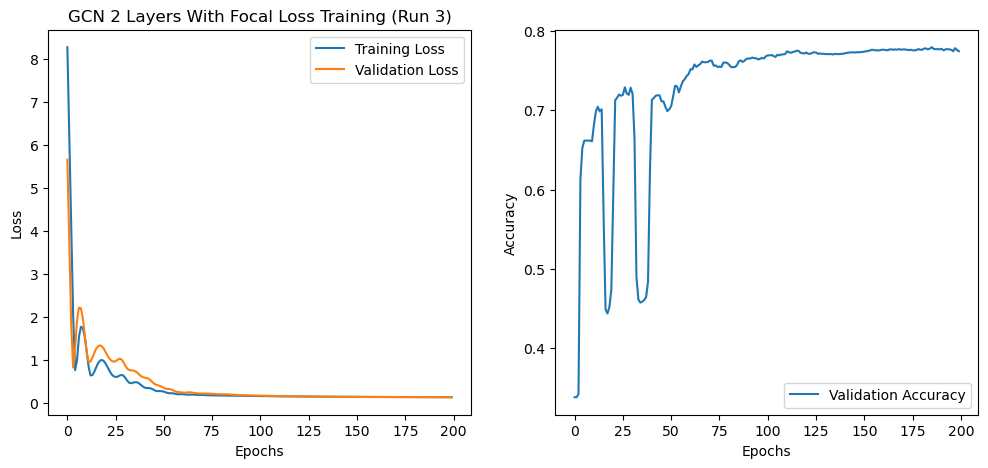


Successfully trained GCN 2 Layers With Focal Loss model (1/2) on chrome-run-01-without-centrality-metrics dataset

Training GCN 2 Layers With Hybrid Loss model (2/2) on chrome-run-01-without-centrality-metrics dataset...

Run: 1/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 50, Loss: 0.3466, Val Loss: 0.3596, Val Accuracy: 0.7667, Val Precision: 0.7325, Val Recall: 0.4889, Val F1: 0.5864
Run: 1/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 100, Loss: 0.2993, Val Loss: 0.3034, Val Accuracy: 0.7797, Val Precision: 0.7248, Val Recall: 0.5624, Val F1: 0.6334
Run: 1/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 150, Loss: 0.2806, Val Loss: 0.2810, Val Accuracy: 0.7841, Val Precision: 0.7370, Val Recall: 0.5624, Val F1: 0.6380
Run: 1/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 200, Loss: 0.2703, Val Loss: 0.2736, Val Accuracy: 0.7856, Val Precision: 0.7476, Val Recall: 0.5531, Val F1: 0.6358
Early stopping at epoch 201


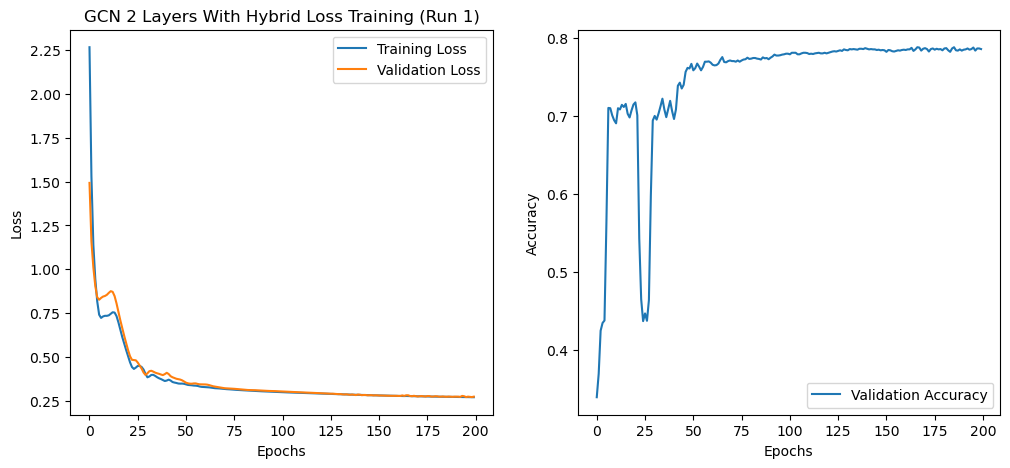

Run: 2/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 50, Loss: 0.3414, Val Loss: 0.3482, Val Accuracy: 0.7888, Val Precision: 0.6890, Val Recall: 0.6849, Val F1: 0.6870
Run: 2/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 100, Loss: 0.2925, Val Loss: 0.2854, Val Accuracy: 0.7848, Val Precision: 0.7342, Val Recall: 0.5706, Val F1: 0.6422
Run: 2/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 150, Loss: 0.2799, Val Loss: 0.2746, Val Accuracy: 0.7817, Val Precision: 0.7405, Val Recall: 0.5461, Val F1: 0.6286
Run: 2/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 200, Loss: 0.2721, Val Loss: 0.2677, Val Accuracy: 0.7856, Val Precision: 0.7516, Val Recall: 0.5473, Val F1: 0.6334
Early stopping at epoch 201


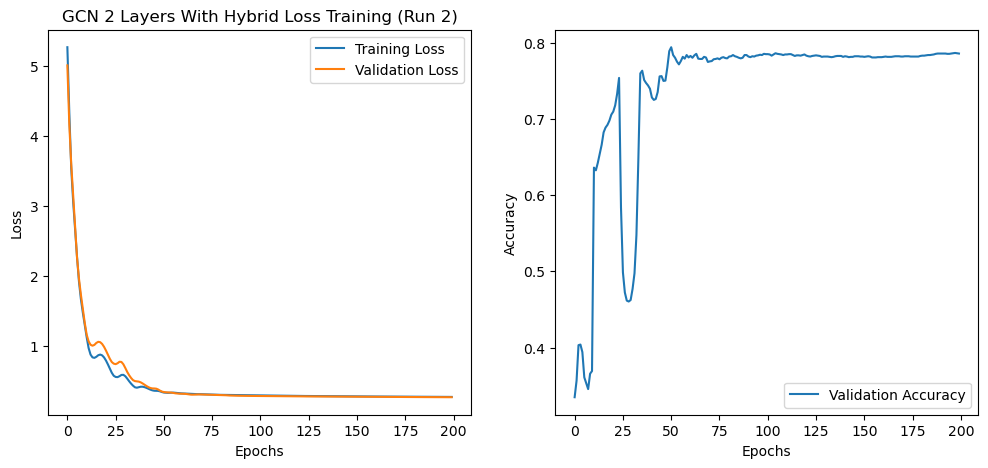

Run: 3/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 50, Loss: 0.3094, Val Loss: 0.3139, Val Accuracy: 0.7825, Val Precision: 0.7284, Val Recall: 0.5694, Val F1: 0.6392
Run: 3/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 100, Loss: 0.2831, Val Loss: 0.2811, Val Accuracy: 0.7864, Val Precision: 0.7438, Val Recall: 0.5624, Val F1: 0.6405
Run: 3/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 150, Loss: 0.2712, Val Loss: 0.2700, Val Accuracy: 0.7833, Val Precision: 0.7399, Val Recall: 0.5543, Val F1: 0.6338
Run: 3/3, Model: GCN 2 Layers With Hybrid Loss, Epoch: 200, Loss: 0.2639, Val Loss: 0.2619, Val Accuracy: 0.7844, Val Precision: 0.7457, Val Recall: 0.5508, Val F1: 0.6336
Early stopping at epoch 201


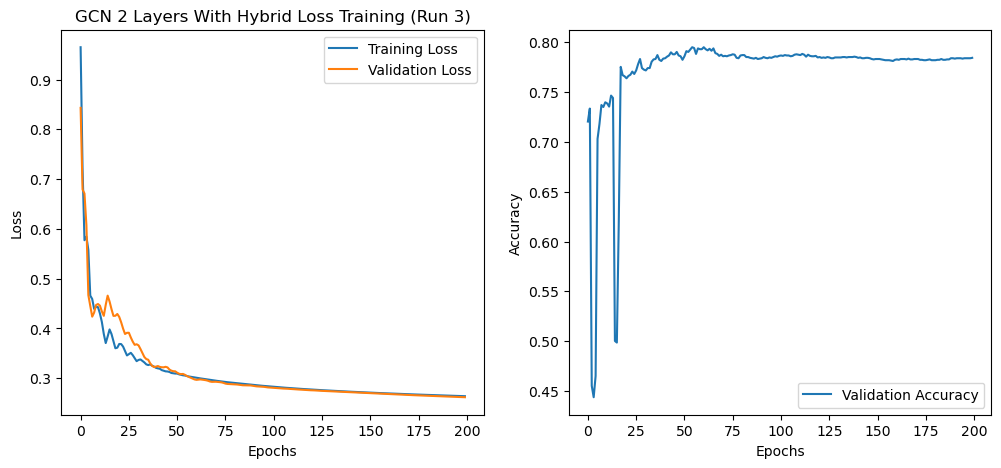


Successfully trained GCN 2 Layers With Hybrid Loss model (2/2) on chrome-run-01-without-centrality-metrics dataset


In [125]:
# Train the models
trained_models_criterias = train_model.train_validate(models_criterias, csv_file, num_runs=3)

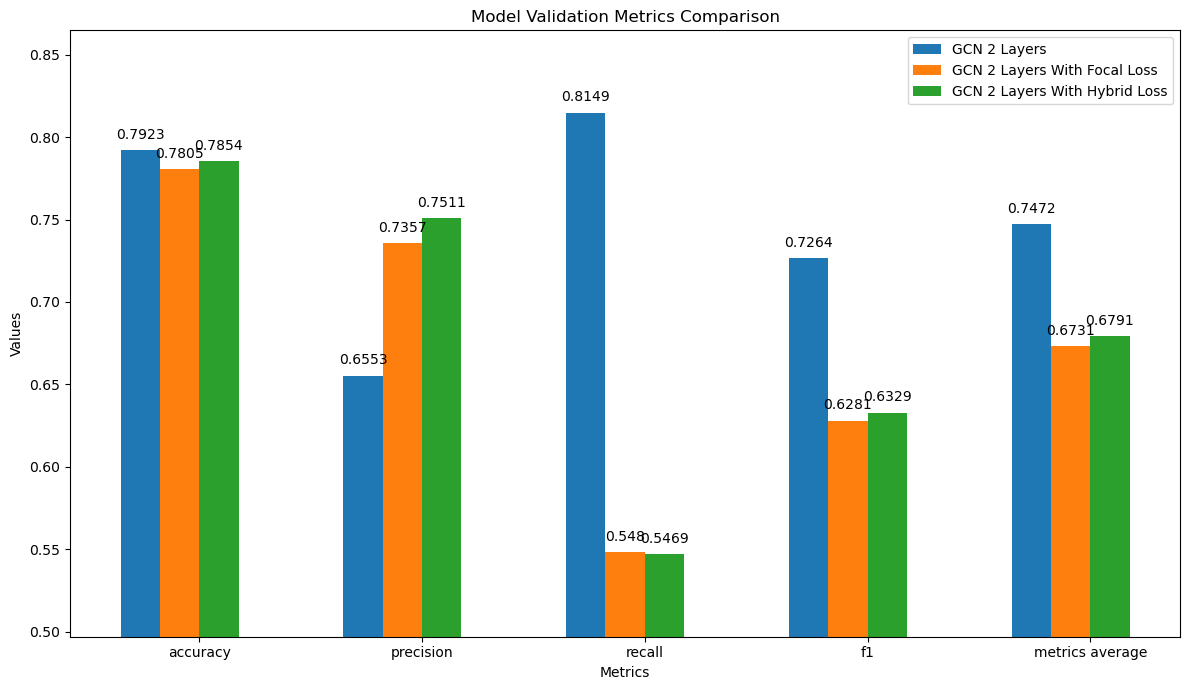

Standard Deviation for Accuracy: 0.005
Standard Deviation for Precision: 0.042
Standard Deviation for Recall: 0.126
Standard Deviation for F1: 0.045


In [126]:
# Compare the models
evaluate_model.plot_val_metrics(base_line_model + trained_models_criterias)

### Step 3: Comparing all models with the ROC curve

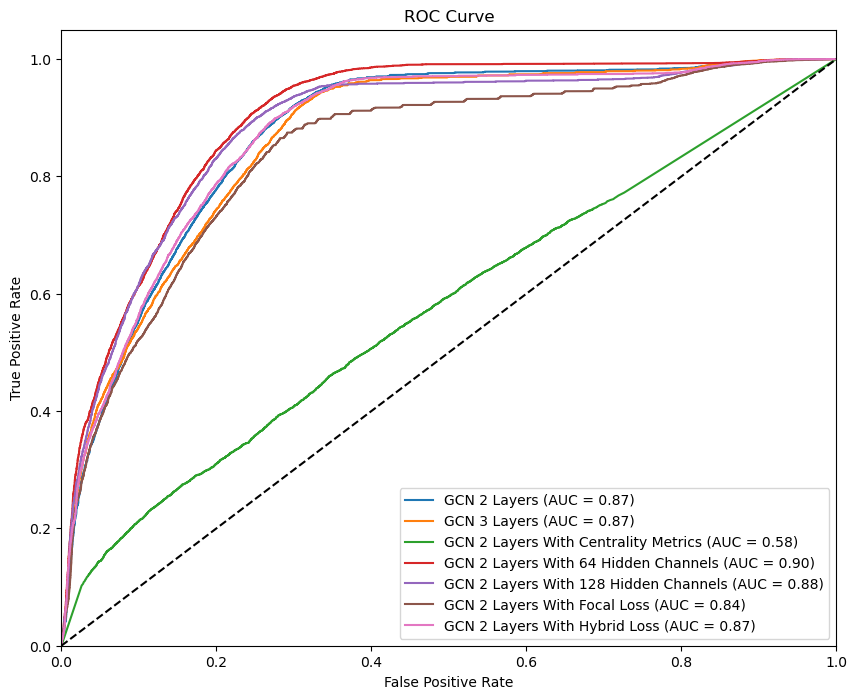

In [127]:
# Plotting the ROC curve for every model
all_trained_models = trained_models_layers + trained_model_with_centrality + trained_models_hidden_channels + trained_models_criterias
evaluate_model.plot_roc(all_trained_models)